In [27]:
import pandas as pd

In [28]:
dataframe = pd.read_csv("credit-card-dataset.csv")
clients_id = dataframe["CUST_ID"]
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
display (dataframe.head(), clients_id)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object

In [29]:
missing = dataframe.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [30]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [31]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5, n_init= 10, max_iter=300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

In [33]:
from sklearn.metrics import silhouette_score

# A metrica de silhouete é uma metrica que avalia a distancia dos pontos dentro do proprio cluster e
# a distancia para o cluster mais proximo.
# O valor varia de [-1 , 1] e valores positivos são considerados satisfatorios, sendo o quanto mais proximo de 1 melhor

silhouette = silhouette_score(values, labels, metric="euclidean")
silhouette


0.3643680838174791

In [34]:
from sklearn.metrics import davies_bouldin_score

# A metrica de Davies Bouldin é uma metrica que avalia a distancia dos pontos dentro do proprio cluster e
# a distancia para o cluster mais proximo.
# Sempre tem um valor positivo, e quanto mais proximo de 0 melhor

dbs = davies_bouldin_score(values, labels)
dbs


1.0760764637641713

In [35]:
from sklearn.metrics import calinski_harabasz_score

# Quanto maior o valor melhor

calinski = calinski_harabasz_score(values, labels)
calinski

3431.777853750359

In [36]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s= silhouette_score(dataset, labels, metric="euclidean")
    dbs = davies_bouldin_score(dataset, labels)
    calinski = calinski_harabasz_score(dataset, labels)
    return(s, dbs, calinski)

In [37]:
s1, dbs1, ch1 = clustering_algorithm(3, values)
print(s1, dbs1, ch1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [38]:
s2, dbs2, ch2 = clustering_algorithm(5, values)
print(s2, dbs2, ch2)

0.3644026320471113 1.0758234649933396 3431.7843808489883


In [39]:
s3, dbs3, ch3 = clustering_algorithm(10, values)
print(s3, dbs3, ch3)

0.3502283359038576 1.1209283852169176 3018.987728115827


In [40]:
s4, dbs4, ch4 = clustering_algorithm(20, values)
print(s4, dbs4, ch4)

0.29708345127048946 1.2087128708170436 2403.721009049143


In [41]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [42]:
import numpy as np

randon_data = np.random.rand(8950, 16)
s_random, dbs_random, ch_random = clustering_algorithm(5, randon_data)
print(s_random, dbs_random, ch_random)
print(s2, dbs2, ch2)

0.039865740532411244 3.483717518552681 302.84913862096585
0.3644026320471113 1.0758234649933396 3431.7843808489883


In [43]:
set_1, set_2, set_3 = np.array_split(values, 3)
s_set_1, dbs_set_1, ch_set_1 = clustering_algorithm(5, set_1)
s_set_2, dbs_set_2, ch_set_2 = clustering_algorithm(5, set_2)
s_set_3, dbs_set_3, ch_set_3 = clustering_algorithm(5, set_3)
print(s_set_1, dbs_set_1, ch_set_1)
print(s_set_2, dbs_set_2, ch_set_2)
print(s_set_3, dbs_set_3, ch_set_3)

0.36884861096035715 1.058820211490599 1204.0640491384652
0.3532183246410258 1.1429408609552179 1194.9401425417568
0.36685269244474583 1.098802783984631 1167.5299723518194


Text(0, 0.5, 'Valor total gasto')

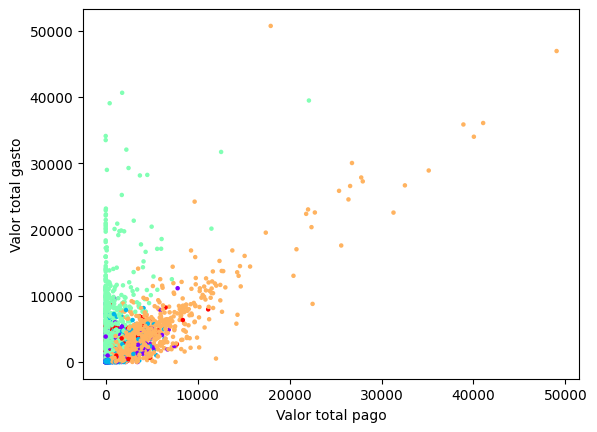

In [44]:
import matplotlib.pyplot as plt

plt.scatter(dataframe["PURCHASES"], dataframe["PAYMENTS"], c=labels, s=5, cmap="rainbow")
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")

In [45]:
# import seaborn as sns

# dataframe["cluster"] = labels
# sns.pairplot(dataframe[0:], hue="cluster")

In [46]:
dataframe["cluster"] = labels

dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2646.0  3034.386903  2476.461110   6.824905  1255.154881   
1        3275.0   444.146902   846.930394   0.000000    23.283648   
2        1073.0  1794.764536  1982.173844   0.000000   507.076999   
3        1544.0  1148.959844  1680.498652   0.000000   210.375599   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2172.596565  4223.606243  18495.558550            2646.0  0.963741   
1          82.980060   410.659944   9630.367575            3275.0  0.774211   
2        1088.056301  2315.003636  14581.459140            1073.0  0.862156   
3         554.332740  1370.859355  19043.138560            1544.0  0.928239   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.100937   8345.641905           2646.0  0.001801   
1        ...       248.968369   4483.503862           3275.0  0.246368   
2        ...       886.322345  21235.065300           1073.0  0.117275   
3        ...       524.184580  18621.013310           1544.0  0.278724   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023273  0.0  0.0  0.000000  0.000000  0.6  
1        0.346480  0.0  0.0  0.000000  0.444444  1.0  
2        0.186801  0.0  0.0  0.083333  0.142857  1.0  
3        0.367326  0.0  0.0  0.083333  0.545455  1.0  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [47]:
centroids = kmeans.cluster_centers_
centroids

array([[5.04072367e-01, 2.72284601e-04, 6.14951436e-02, 3.61370321e-02,
        2.53798410e-02, 2.53108530e-01, 6.71483888e-05, 2.56845751e-05,
        4.48838933e-05, 5.74747433e-05, 1.15775149e-03, 1.32631477e-03,
        7.19411813e-01, 1.65994396e-01, 1.79095726e-01, 5.52720859e-07],
       [6.90354147e-02, 2.30537477e-04, 1.21263619e-01, 4.79919449e-02,
        7.33721173e-02, 2.41761600e-02, 1.72670253e-04, 3.37032346e-05,
        1.40085560e-04, 7.91321911e-06, 1.23658802e-04, 2.85892435e-03,
        9.43812656e-01, 1.53487377e-01, 5.68225681e-02, 7.58672019e-05],
       [2.35317569e-01, 2.16489198e-04, 6.04496610e-02, 3.43849416e-02,
        2.60699292e-02, 4.00329698e-01, 5.27098698e-05, 2.04691453e-05,
        3.52611341e-05, 6.55102544e-05, 1.57205221e-03, 1.12372153e-03,
        5.35048542e-01, 5.97748295e-01, 1.04521037e-01, 2.77239617e-05],
       [1.59970277e-01, 2.45420653e-04, 4.37832758e-01, 2.56342445e-01,
        1.81661269e-01, 2.57701902e-02, 2.04632150e-04, 8.878

In [48]:
max = len(centroids[0])
for i in range(max):
    print(f"{dataframe.columns.values[i]}: {centroids[:, i].var():.4f}")

BALANCE: 0.0224
BALANCE_FREQUENCY: 0.0000
PURCHASES: 0.0196
ONEOFF_PURCHASES: 0.0076
INSTALLMENTS_PURCHASES: 0.0036
CASH_ADVANCE: 0.0226
PURCHASES_FREQUENCY: 0.0000
ONEOFF_PURCHASES_FREQUENCY: 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY: 0.0000
CASH_ADVANCE_FREQUENCY: 0.0000
CASH_ADVANCE_TRX: 0.0000
PURCHASES_TRX: 0.0000
CREDIT_LIMIT: 0.0360
PAYMENTS: 0.0279
MINIMUM_PAYMENTS: 0.0540
PRC_FULL_PAYMENT: 0.0000


In [49]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean().round(2)
description["n_clients"] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,3034.39,381.57,1637.35,4490.44,965.99,2646
1,444.15,628.97,141.67,5135.05,814.09,3275
2,1794.76,475.79,3270.71,3975.46,4706.79,1073
3,1148.96,3267.50,182.61,4107.36,3035.90,1544
4,1987.15,858.33,420.11,2226.70,1338.97,412


### Análise dos clusters:
CLUSTER 0: Clientes com os menores valores em gastos. Menor valor em saques. Clientes com maior limite. Bons Pagadores. Maior numero de clientes.  
CLUSTER 1: Clientes com os maiores valores em gastos. Menor valor em compras. Valor considerável em saques. Piores pagadores. Boa quantidade de Clientes.  
CLUSTER 2: Maior valor em compras com grande diferença. Melhores Pagadores.  
CLUSTER 3: Maior valor em saques. Pagam as vezes.  
CLUSTER 4: Clientes com menor limite. Não são bons pagadores. Menor quantidade de clientes.  

### Resumindo:
CLUSTER 0: Maior grupo, possuí os clientes que gastam pouco, são bons pagadores e tem o maior limite.  
CLUSTER 1: Boa quantidade de clientes, possuem foco em saque e são os que mais gastam porém são os piores pagadores.  
CLUSTER 2: Clientes que gastam muito com compras e são os melhores pagadores.  
CLUSTER 3: Clientes que realizam muitos saques e pagam as vezes.  
CLUSTER 4: Menor grupo, possuí os clientes com menor limite e que não são bons pagadores.  

In [50]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2646.0,0.001801,0.023273,0.0,0.0,0.000000,0.000000,0.6
1,3275.0,0.246368,0.346480,0.0,0.0,0.000000,0.444444,1.0
2,1073.0,0.117275,0.186801,0.0,0.0,0.083333,0.142857,1.0
3,1544.0,0.278724,0.367326,0.0,0.0,0.083333,0.545455,1.0
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0


In [53]:
dataframe.join(clients_id)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster,CUST_ID
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,1,C10001
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,2,C10002
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,1,C10003
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,1,C10004
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,0,C10005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,1,C19186
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,1,C19187
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,1,C19188
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,1,C19189
